In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris

In [3]:
var = load_iris()
var.data = np.delete(var.data, [2,3], axis=1)
var.data
var.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(var.data, columns = ['Sepal Length', 'Sepal width'])
df['target']= var.target
df['flower name'] = df.target.apply(lambda x: var.target_names[x])
df

,Sepal Length,Sepal width,target,flower name
0,5.1,3.5,0,setosa
1,4.9,3.0,0,setosa
2,4.7,3.2,0,setosa
3,4.6,3.1,0,setosa
4,5.0,3.6,0,setosa
...,...,...,...,...
145,6.7,3.0,2,virginica
146,6.3,2.5,2,virginica
147,6.5,3.0,2,virginica
148,6.2,3.4,2,virginica


In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['Sepal Length','Sepal width']])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [34]:
df['cluster']=y_pred
df.head()

,Sepal Length,Sepal width,target,flower name,cluster
0,5.1,3.5,0,setosa,2
1,4.9,3.0,0,setosa,2
2,4.7,3.2,0,setosa,2
3,4.6,3.1,0,setosa,2
4,5.0,3.6,0,setosa,2


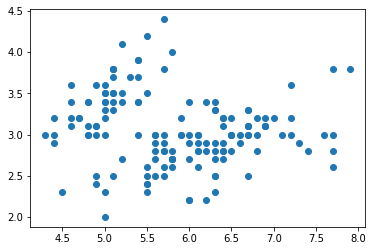

In [35]:
plt.scatter(df['Sepal Length'],df['Sepal width'])


In [36]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

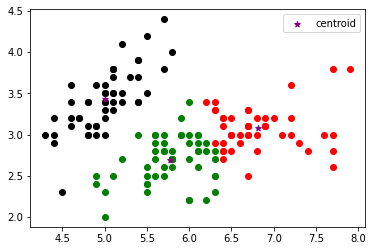

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Sepal Length'],df1['Sepal width'],color='green')
plt.scatter(df2['Sepal Length'],df2['Sepal width'],color='red')
plt.scatter(df3['Sepal Length'],df3['Sepal width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [43]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(df[['Sepal Length']])
df['Sepal Length']= scaler.transform(df[['Sepal Length']])
scaler.fit(df[['Sepal width']])
df['Sepal width']= scaler.transform(df[['Sepal width']])
df

,Sepal Length,Sepal width,target,flower name,cluster
0,0.222222,0.625000,0,setosa,2
1,0.166667,0.416667,0,setosa,2
2,0.111111,0.500000,0,setosa,2
3,0.083333,0.458333,0,setosa,2
4,0.194444,0.666667,0,setosa,2
...,...,...,...,...,...
145,0.666667,0.416667,2,virginica,1
146,0.555556,0.208333,2,virginica,0
147,0.611111,0.416667,2,virginica,1
148,0.527778,0.583333,2,virginica,1


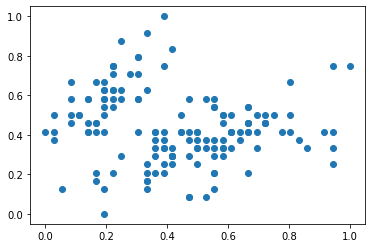

In [44]:
plt.scatter(df['Sepal Length'], df['Sepal width'])

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['Sepal Length','Sepal width']])
y_pred
km.cluster_centers_
df['new_cluster'] = y_pred
df.drop(['new cluster'],axis='columns')

,Sepal Length,Sepal width,target,flower name,cluster,new_cluster
0,0.222222,0.625000,0,setosa,2,0
1,0.166667,0.416667,0,setosa,2,0
2,0.111111,0.500000,0,setosa,2,0
3,0.083333,0.458333,0,setosa,2,0
4,0.194444,0.666667,0,setosa,2,0
...,...,...,...,...,...,...
145,0.666667,0.416667,2,virginica,1,1
146,0.555556,0.208333,2,virginica,0,2
147,0.611111,0.416667,2,virginica,1,1
148,0.527778,0.583333,2,virginica,1,1


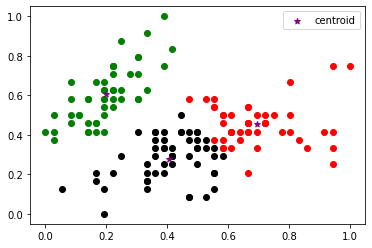

In [57]:
df1 = df[df.new_cluster==0]
df2 = df[df.new_cluster==1]
df3 = df[df.new_cluster==2]
plt.scatter(df1['Sepal Length'],df1['Sepal width'],color='green')
plt.scatter(df2['Sepal Length'],df2['Sepal width'],color='red')
plt.scatter(df3['Sepal Length'],df3['Sepal width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

[12.79775720164609,
 6.855290526033279,
 4.115194202754065,
 3.2174838565233785,
 2.563919868867785,
 2.104723245022724,
 1.8135826598393987,
 1.5474286613152655,
 1.268726550351074]

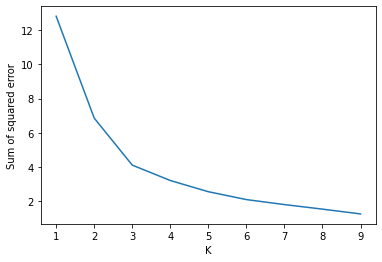

In [60]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Sepal Length','Sepal width']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
sse